In [3]:
import rdkit.Chem as Chem
import os
from os.path import join
import argparse

supp = Chem.SDMolSupplier("../data/raw_data/cyp_screen/test_3D_opt_1216.sdf", removeHs = False)
it = iter(supp)
mols = []
for i in range(10):
    mols.append(next(it))


trad = "equibind_inference_test/traditional"
os.makedirs(join("data", trad), exist_ok = True)
with Chem.SDWriter("data/equibind_inference_test/first_10_ligs.sdf") as file:
    for mol in mols:
        path = join("data", trad, mol.GetProp('_Name').replace(" ", "_"))
        os.makedirs(path, exist_ok=True)
        with Chem.SDWriter(join(path, "ligand.sdf")) as file2:
            file2.write(mol)
        file.write(mol)


In [43]:
from futils import loaders

In [71]:
idk1 = loaders.load_bulk2("data/equibind_inference_test/gnina/old.txt")
idk2 = loaders.load_bulk2("data/equibind_inference_test/gnina/new.txt")
idk1 = idk1.sort_index()
idk2 = idk2.sort_index()

In [77]:
idk1.merge(idk2, left_index=True, right_index=True)

,Affinity_x,RMSD_x,CNNscore_x,CNNaffinity_x,CNNvariance_x,Affinity_y,RMSD_y,CNNscore_y,CNNaffinity_y,CNNvariance_y
0,-3.28760,7.62744,0.62209,3.98474,0.13294,-3.83560,5.30261,0.64537,3.99892,0.31732
1,38.62427,1.56648,0.01668,2.83790,0.48300,38.62434,1.56646,0.01668,2.83791,0.48303
2,-3.99482,6.72708,0.12423,3.35970,0.24628,-1.57220,7.03574,0.47274,3.94876,1.89515
3,-2.67083,3.80475,0.67283,3.10549,0.06746,-2.51674,4.93175,0.58492,2.97297,0.10012
4,-3.86084,5.82073,0.14346,2.70187,0.40759,31.95067,4.28315,0.09479,2.56137,0.12761
5,-3.15577,5.58285,0.32386,2.49802,0.25251,-3.15575,5.58304,0.32399,2.49813,0.25239
6,-3.57740,6.87529,0.31177,3.36817,0.42246,0.37097,5.07232,0.56558,4.03827,0.26912
7,-2.98807,5.94396,0.60506,4.25407,0.06311,-1.89366,6.19015,0.68847,4.32716,0.22811
8,12.98886,3.15486,0.57594,3.74505,0.26680,12.98906,3.39595,0.57597,3.74521,0.26673
9,-3.63906,4.20170,0.59644,3.45660,0.40518,-3.63852,4.20095,0.59647,3.45692,0.40544


In [81]:
idk1-idk2

,Affinity,RMSD,CNNscore,CNNaffinity,CNNvariance
0,0.54800,2.32483,-0.02328,-0.01418,-0.18438
1,-0.00007,0.00002,0.00000,-0.00001,-0.00003
2,-2.42262,-0.30866,-0.34851,-0.58906,-1.64887
3,-0.15409,-1.12700,0.08791,0.13252,-0.03266
4,-35.81151,1.53758,0.04867,0.14050,0.27998
5,-0.00002,-0.00019,-0.00013,-0.00011,0.00012
6,-3.94837,1.80297,-0.25381,-0.67010,0.15334
7,-1.09441,-0.24619,-0.08341,-0.07309,-0.16500
8,-0.00020,-0.24109,-0.00003,-0.00016,0.00007
9,-0.00054,0.00075,-0.00003,-0.00032,-0.00026


In [82]:
new_mols = Chem.SDMolSupplier("data/equibind_inference_test/ultimate_outputs/new.sdf")
old_mols = Chem.SDMolSupplier("data/equibind_inference_test/ultimate_outputs/old.sdf")
unprocessed = Chem.SDMolSupplier("data/equibind_inference_test/first_10_ligs.sdf")

In [84]:
for i, (new_mol, old_mol, dumb_mol) in enumerate(zip(new_mols, old_mols, unprocessed)):
    print(i, ((new_mol.GetConformer().GetPositions() - old_mol.GetConformer().GetPositions())**2).sum())

0 4.000000000127905e-08
1 0.37098655999999736
2 23.075276299999988
3 19.393032710000025
4 5.999999999687816e-08
5 4.0000000000568506e-08
6 2.0000000000706138e-08
7 2.9999999999860164e-08
8 4.412734360000007
9 5.0000000000477486e-08


In [20]:
print([mol.GetProp('_Name') for mol in new_mols])
print()
print([mol.GetProp('_Name') for mol in old_mols])

['Pyridoxal Phosphate', 'L-Phenylalanine', 'Biotin', 'Methionine', 'L-Tyrosine', 'L-Leucine', 'L-Tryptophan', 'Thiamine', 'L-Valine', 'Pyridoxine']

['Pyridoxal Phosphate', 'L-Phenylalanine', 'Biotin', 'Methionine', 'L-Tyrosine', 'L-Leucine', 'L-Tryptophan', 'Thiamine', 'L-Valine', 'Pyridoxine']


In [23]:
new_mol.GetConformer().GetPositions() - old_mol.GetConformer().GetPositions()

array([[-1.0171, -2.1451, -0.7204],
       [ 0.8197, -2.2254,  1.1048],
       [-0.2362, -2.1967,  0.6439],
       [-0.607 , -1.1498, -1.3314],
       [-2.4297, -4.1758, -0.0602],
       [ 0.3808,  0.1043, -1.2608],
       [-1.8027, -1.3919, -2.1735],
       [ 1.0389, -2.1404,  1.6017],
       [ 1.6909, -1.339 ,  1.0062],
       [ 1.0601, -1.5085,  0.7721],
       [ 2.3928, -0.8698,  0.8258],
       [ 0.4215, -1.9909,  0.9501],
       [ 0.4335, -2.2908,  1.3687],
       [ 1.6491, -1.6745,  1.4187],
       [-0.2278, -2.7701,  1.5834],
       [ 1.0553, -1.2149,  0.3521]])

In [16]:
def parse(arglist = None):
    p = argparse.ArgumentParser()
    p.add_argument("--trad", action="store_true")
    p.add_argument("--no_new", dest = "new", action="store_false")
    p.add_argument("--no_gnina", dest = "gnina", action="store_false")
    p.add_argument("--force_gnina", dest = "force", action="store_true")
    p.add_argument("--seed", type=int, default = 1)
    p.add_argument("--use_rdkit_coords", action="store_const", const = "--use_rdkit_coords", default = None)
    
    return p.parse_args(arglist)

In [56]:
def parse(arglist = None):
    p = argparse.ArgumentParser()
    p.add_argument("--no_use_rdkit_coords", action="store_false", dest = "use_rdkit_coords")
    p.add_argument("--use_rdkit_coords", action="store_true")
    
    return p.parse_args(arglist)

In [57]:
parse([])

Namespace(use_rdkit_coords=True)

In [18]:
parse(["--use_rdkit_coords"])

Namespace(force=False, gnina=True, new=True, seed=1, trad=False, use_rdkit_coords='--use_rdkit_coords')

In [11]:
conf.GetPositions()

array([[ 0.7551, 16.2956, 72.9805],
       [-0.7845, 16.1968, 73.7088],
       [-1.2199, 19.1857, 68.4471],
       [ 1.4799, 17.7849, 73.3313],
       [ 1.7288, 15.0505, 73.5833],
       [-2.8979, 19.2321, 72.2437],
       [ 0.6301, 16.1377, 71.4816],
       [ 0.1062, 16.0394, 69.7446],
       [-1.1636, 17.0399, 71.5147],
       [-1.4866, 18.1269, 70.6567],
       [-1.7   , 16.9242, 72.9233],
       [-0.9777, 18.1308, 69.3345],
       [-0.185 , 17.0579, 68.8971],
       [-0.3531, 16.0069, 71.0189],
       [ 0.3698, 17.0304, 67.5055],
       [-2.3772, 19.2273, 71.0977]])

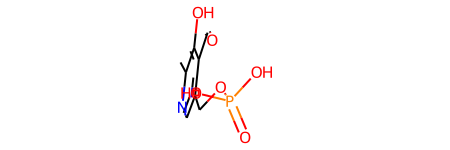

In [8]:
old_mol